In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("df_def.csv", index_col=0)

In [87]:
df.head()

,product_name,brands,categories,pnns_groups_1,pnns_groups_2,image_url,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore,nutrigrade
0,vitória crackers,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,1570.0500,7.0,3.08,70.1,15.0,NaN,7.8,1.40,-1.4,a
1,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,936.0000,8.2,2.20,29.0,22.0,0.0,5.1,4.60,18.0,d
2,sauce sweety chili 0%,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,87.9228,0.0,0.00,4.8,0.4,NaN,0.2,2.04,6.0,c
3,mini coco,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,251.2080,3.0,1.00,10.0,3.0,NaN,2.0,1.15,3.2,b
4,pur jus de pomme,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,263.7684,0.0,0.00,15.5,15.5,NaN,0.2,0.00,13.0,d


In [88]:
df.shape

(579131, 16)

In [89]:
df.isna().sum()

product_name               0
brands                248175
categories            285463
pnns_groups_1              0
pnns_groups_2              0
image_url              41734
energy-kj_100g             0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g            447514
proteins_100g              0
salt_100g                  0
nutriscore                 0
nutrigrade                 0
dtype: int64

# Sommaire <a class='anchor' id='S'></a>

## [I, Analyses univariées](#I)

## [II, Analyses multivariées](#II)

## [III, Analyse des composantes principales](#III)

### [A, Ébouli des valeurs propres](#IIIA)

### [B, Cercle des corrélations](#IIIB)

### [C, Représenation graphique](#IIIC)

## [IV, ANOVA](#IV)

## [V, Application](#V)


##### [fin de page](#eop)

## I, Analyses univariées <a class='anchor' id='I'></a>

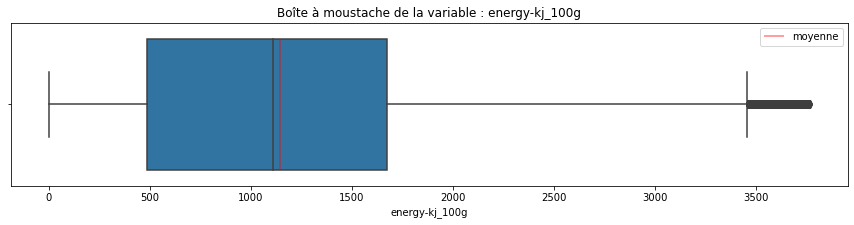

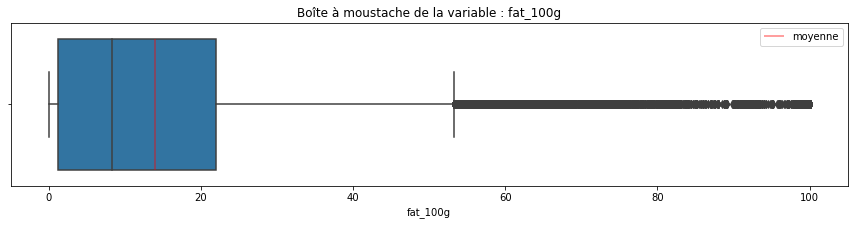

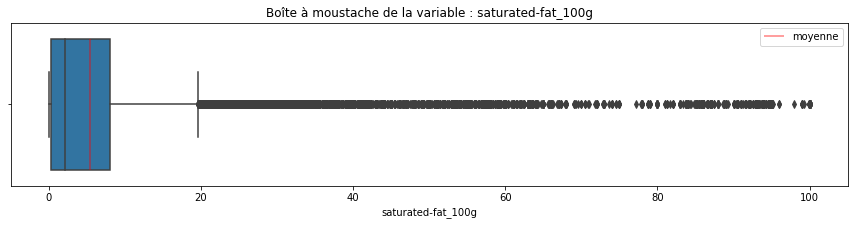

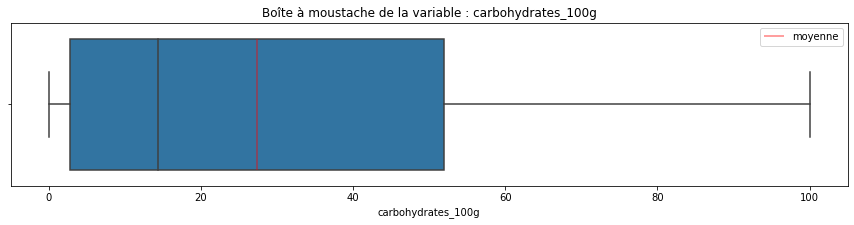

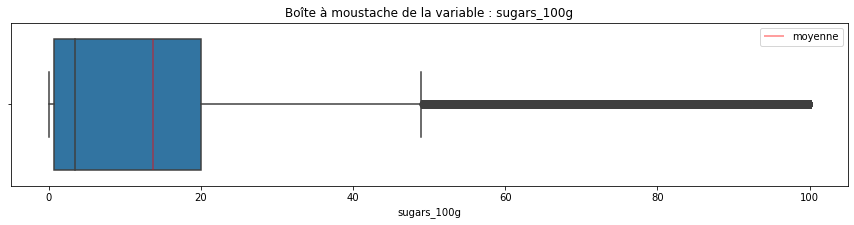

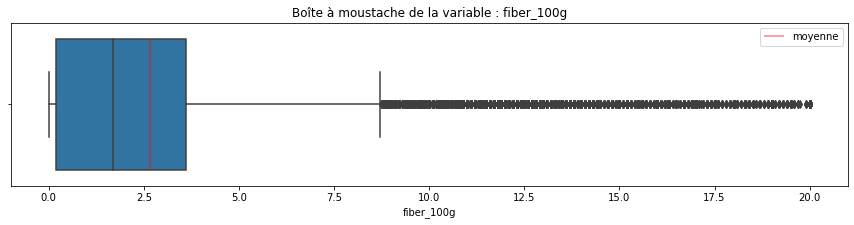

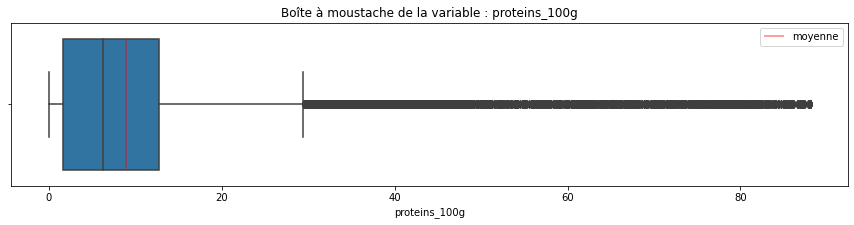

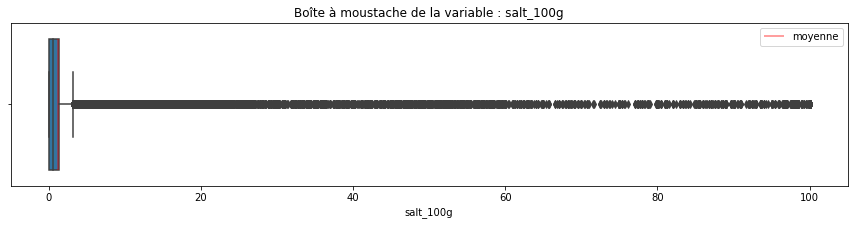

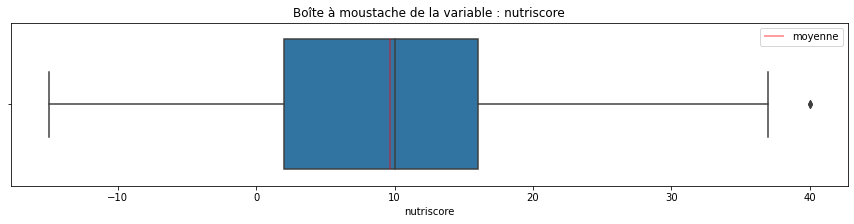

In [90]:
for c in df.columns:
    if df[c].dtypes == 'float':
        plt.figure(figsize=(15,3))
        sns.boxplot(data=df, x=c)
        plt.vlines(df[c].mean(),ymin=-0.4, ymax=0.4, color='red', alpha=0.5, label='moyenne')
        plt.title("Boîte à moustache de la variable : {}".format(c))
        plt.legend()
        #plt.savefig("boxplot_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

In [91]:
df.salt_100g.describe()

count    579131.000000
mean          1.263835
std           4.271758
min           0.000000
25%           0.080000
50%           0.560000
75%           1.300000
max         100.000000
Name: salt_100g, dtype: float64

In [92]:
df.carbohydrates_100g.describe()

count    579131.000000
mean         27.341996
std          27.602166
min           0.000000
25%           2.800000
50%          14.300000
75%          52.000000
max         100.000000
Name: carbohydrates_100g, dtype: float64

Après avoir représenté chaque variable quantitative par une boîte à moustache, nous allons étudier les répartitions des données avec des histogrammes.

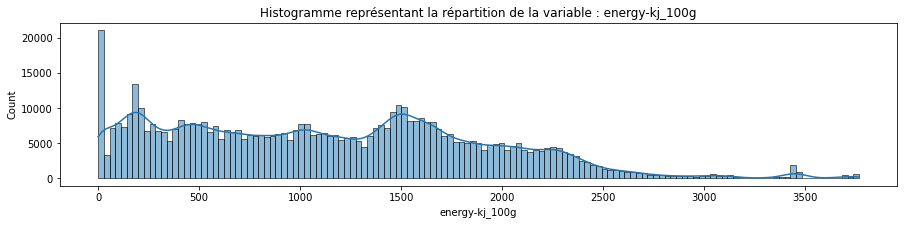

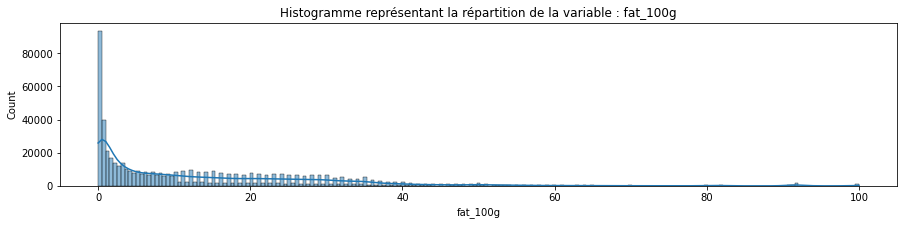

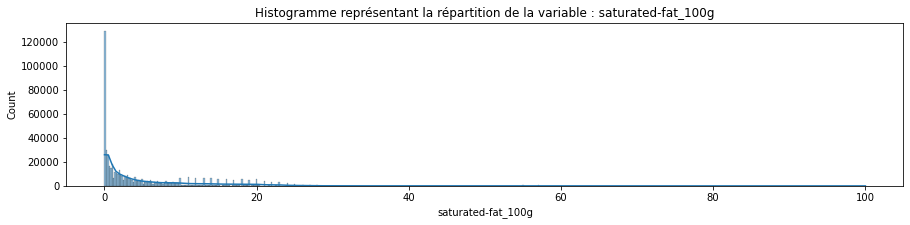

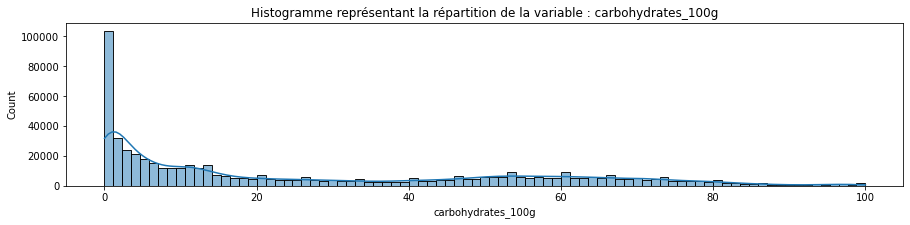

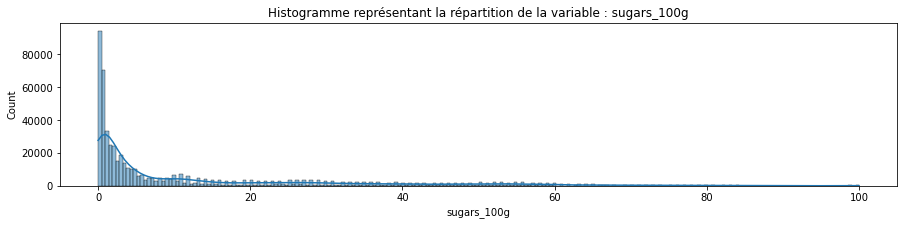

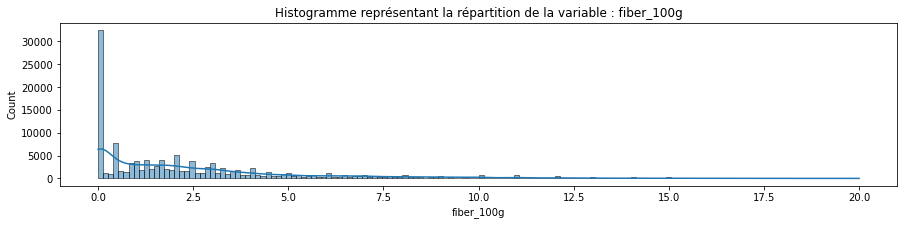

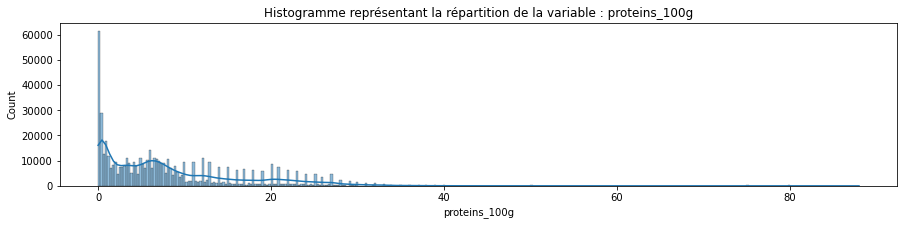

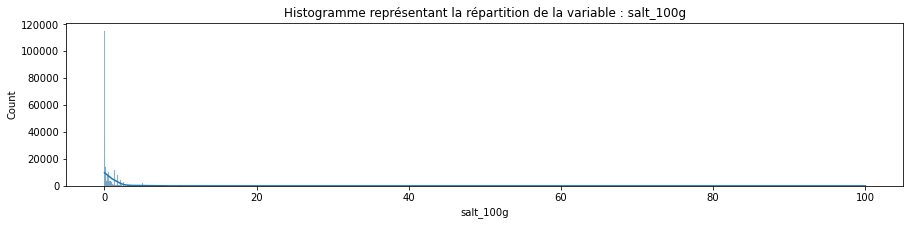

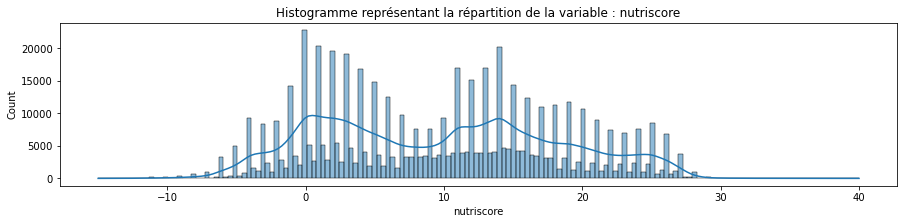

In [93]:
for c in df.columns:
    if df[c].dtypes == 'float':
        f, ax = plt.subplots(figsize=(15,3))
        sns.histplot(data=df, x=c, kde=True, ax=ax)
        plt.vlines(df[c].mean(),ymin=-0.4, ymax=0.4, color='red', alpha=0.5)
        plt.title("Histogramme représentant la répartition de la variable : {}".format(c))
        #plt.savefig("histogramme_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

In [94]:
from scipy.stats import normaltest, shapiro, anderson

In [95]:
# normality test
stat, p = normaltest(df.nutriscore)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=107556.074, p=0.000
Sample does not look Gaussian (reject H0)


In [96]:
# normality test
stat, p = shapiro(df.nutriscore)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.972, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\Alex\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [97]:
# normality test
result = anderson(df.nutriscore)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 4972.617
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


##### [sommaire](#S)

## II, Analyses multivariées <a class='anchor' id='II'></a>

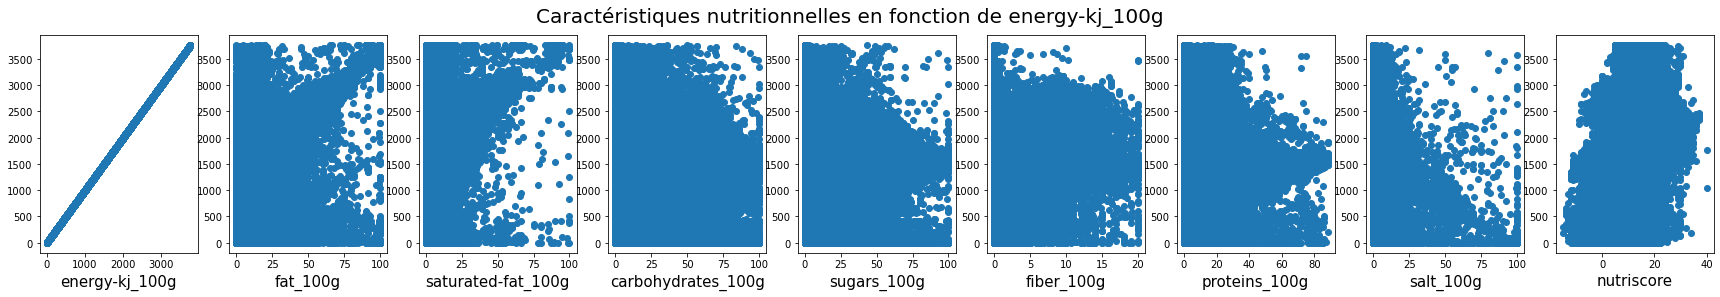

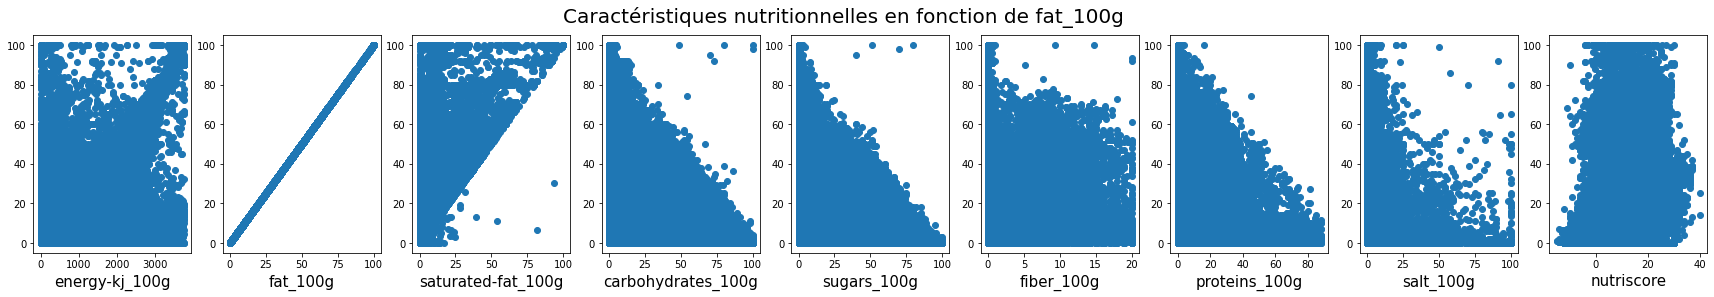

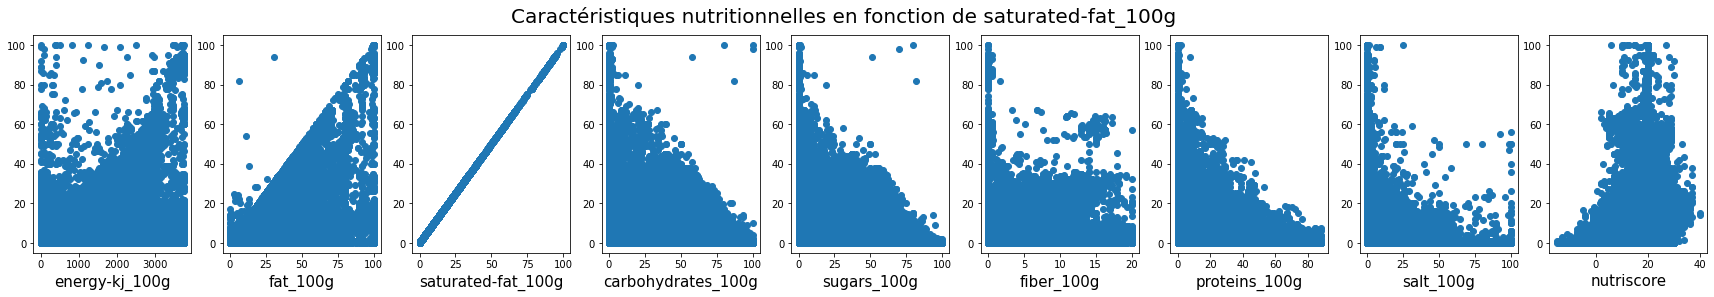

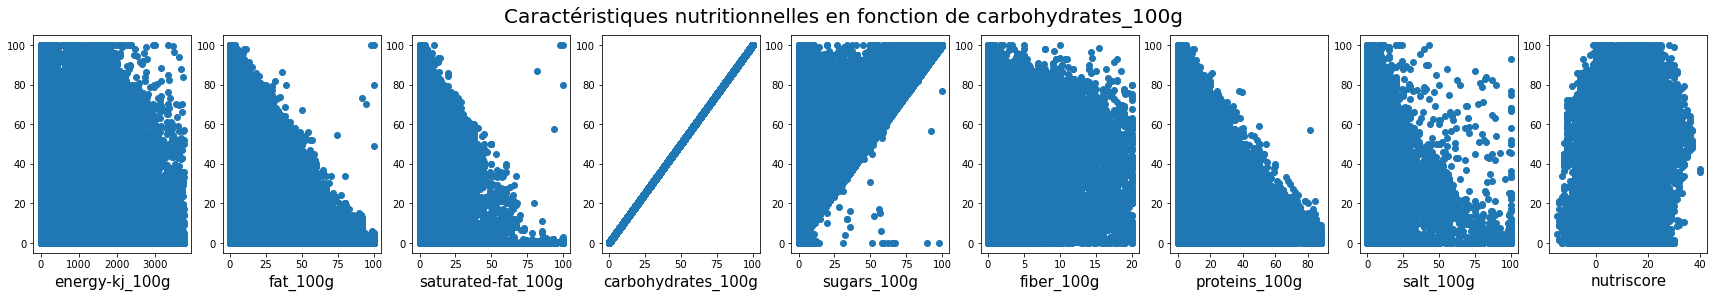

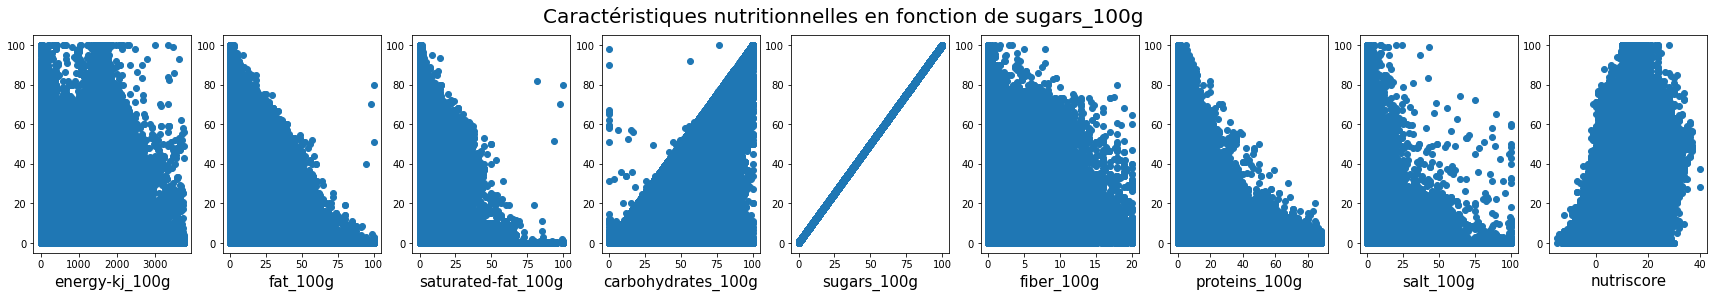

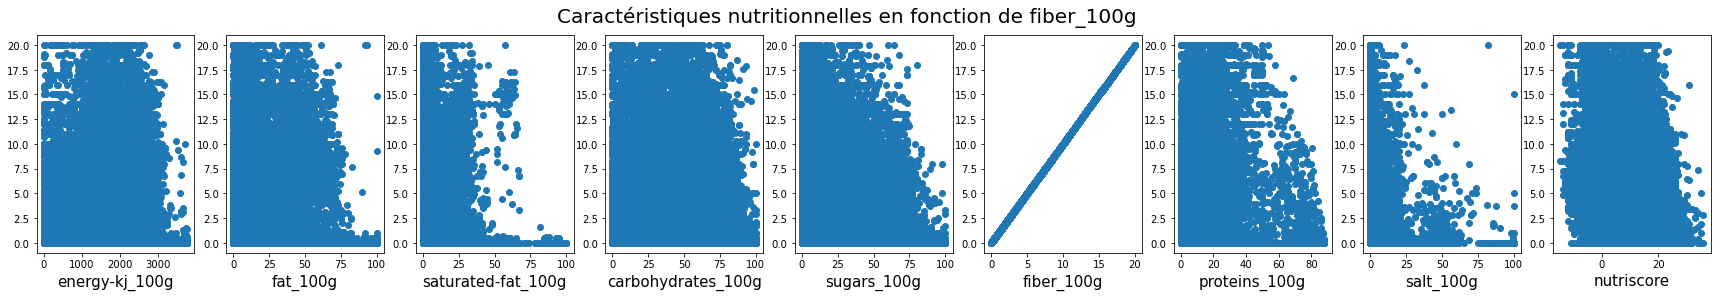

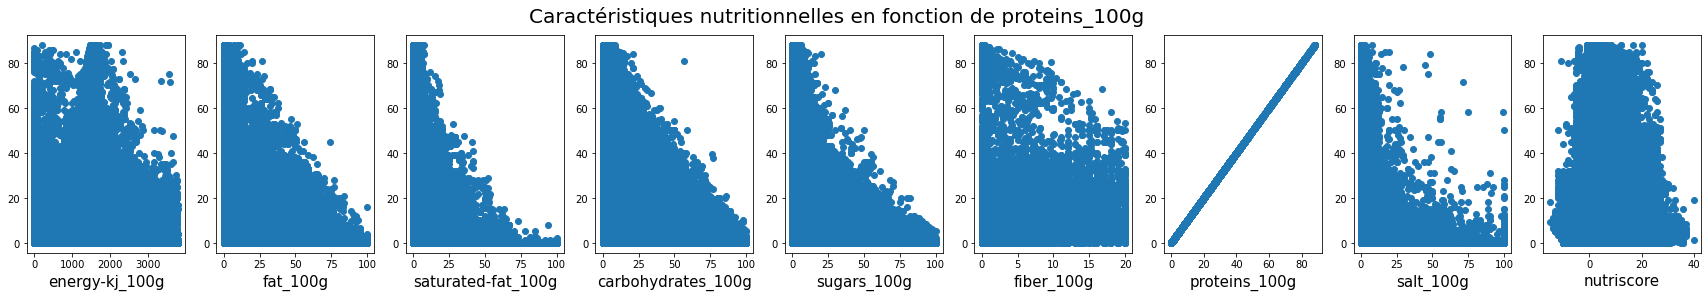

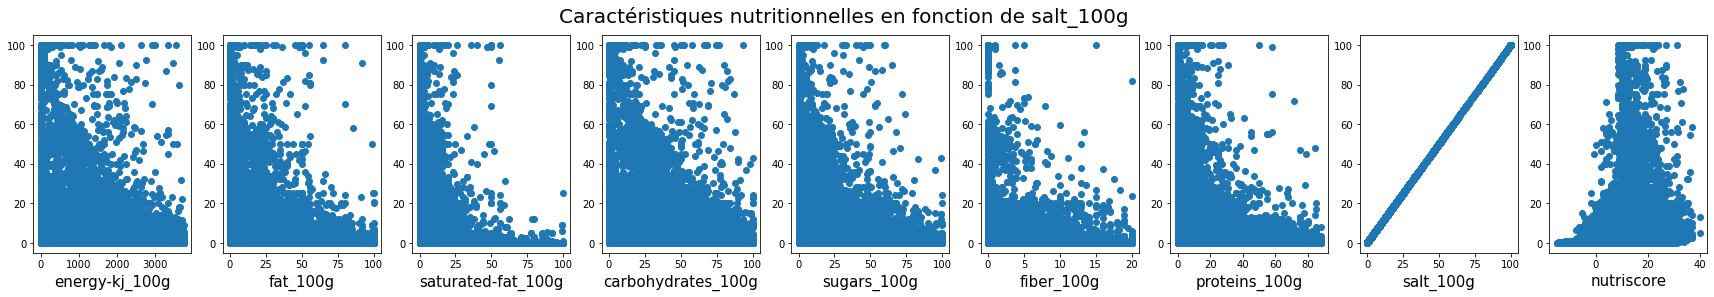

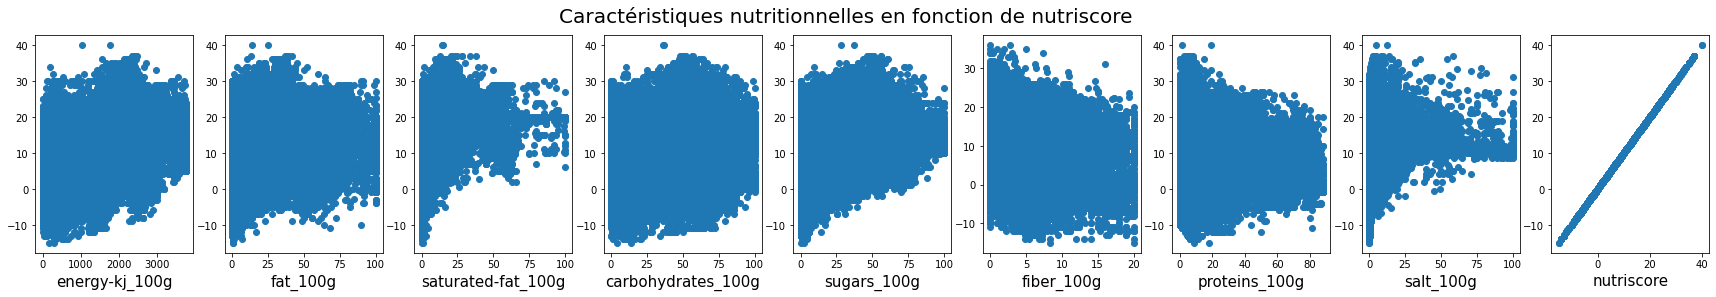

In [98]:
liste = []

for c in df.columns :
    if df[c].dtypes == 'float':
        liste.append(c)
dft = df.loc[:,liste]

for c in range(len(dft.columns)):
    f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=1, ncols=9, figsize=(30,4))
    plt.suptitle('Caractéristiques nutritionnelles en fonction de {}'.format(dft.columns[c]), fontsize=20)
    ax1.scatter(dft.iloc[:,[0]], dft.iloc[:,[c]])
    ax1.set_xlabel(dft.columns[0], fontsize=15)
    ax2.scatter(dft.iloc[:,[1]], dft.iloc[:,[c]])
    ax2.set_xlabel(dft.columns[1], fontsize=15)
    ax3.scatter(dft.iloc[:,[2]], dft.iloc[:,[c]])
    ax3.set_xlabel(dft.columns[2], fontsize=15)
    ax4.scatter(dft.iloc[:,[3]], dft.iloc[:,[c]])
    ax4.set_xlabel(dft.columns[3], fontsize=15)
    ax5.scatter(dft.iloc[:,[4]], dft.iloc[:,[c]])
    ax5.set_xlabel(dft.columns[4], fontsize=15)
    ax6.scatter(dft.iloc[:,[5]], dft.iloc[:,[c]])
    ax6.set_xlabel(dft.columns[5], fontsize=15)
    ax7.scatter(dft.iloc[:,[6]], dft.iloc[:,[c]])
    ax7.set_xlabel(dft.columns[6], fontsize=15)
    ax8.scatter(dft.iloc[:,[7]], dft.iloc[:,[c]])
    ax8.set_xlabel(dft.columns[7], fontsize=15)
    ax9.scatter(dft.iloc[:,[8]], dft.iloc[:,[c]])
    ax9.set_xlabel(dft.columns[8], fontsize=15)
    #plt.savefig("bivarie_"+dft.columns[c]+".png", bbox_inches='tight', transparent=True)
    plt.show()

Graphiquement on ne constate pas de corrélation forte entre deux variables.

In [99]:
for c in df.columns:
    if df[c].dtypes == 'float':
        df2 = df.loc[:,['nutriscore', c]]
        df2.dropna(inplace=True)
        matrix = df2.corr(method='pearson')
        print(c)
        print(matrix)
        print('-------------------------------------------------------')

energy-kj_100g
                nutriscore  energy-kj_100g
nutriscore        1.000000        0.615547
energy-kj_100g    0.615547        1.000000
-------------------------------------------------------
fat_100g
            nutriscore  fat_100g
nutriscore    1.000000  0.538164
fat_100g      0.538164  1.000000
-------------------------------------------------------
saturated-fat_100g
                    nutriscore  saturated-fat_100g
nutriscore            1.000000            0.618396
saturated-fat_100g    0.618396            1.000000
-------------------------------------------------------
carbohydrates_100g
                    nutriscore  carbohydrates_100g
nutriscore            1.000000            0.256217
carbohydrates_100g    0.256217            1.000000
-------------------------------------------------------
sugars_100g
             nutriscore  sugars_100g
nutriscore     1.000000     0.423617
sugars_100g    0.423617     1.000000
-------------------------------------------------------
f

##### [sommaire](#S)

## III, Analyse des composantes principales <a class='anchor' id='III'></a>

In [100]:
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA

In [101]:
dft.head()

,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore
0,1570.0500,7.0,3.08,70.1,15.0,NaN,7.8,1.40,-1.4
1,936.0000,8.2,2.20,29.0,22.0,0.0,5.1,4.60,18.0
2,87.9228,0.0,0.00,4.8,0.4,NaN,0.2,2.04,6.0
3,251.2080,3.0,1.00,10.0,3.0,NaN,2.0,1.15,3.2
4,263.7684,0.0,0.00,15.5,15.5,NaN,0.2,0.00,13.0


In [102]:
# Pb NA Fiber => mean()
fibre = []
mean = dft.fiber_100g.mean()
for v in dft.fiber_100g:
    if np.isnan(v):
        fibre.append(mean)
    else:
        fibre.append(v)

In [103]:
dft.fiber_100g = fibre

In [104]:
dft.isna().sum()

energy-kj_100g        0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
nutriscore            0
dtype: int64

In [105]:
liste = list(dft.columns)

In [106]:
liste

['energy-kj_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutriscore']

In [107]:
liste.remove('fiber_100g')

In [108]:
dft = dft.dropna()
df = df.dropna(subset=liste)

In [109]:
dft.isna().sum()

energy-kj_100g        0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
nutriscore            0
dtype: int64

In [110]:
df.isna().sum()

product_name               0
brands                248175
categories            285463
pnns_groups_1              0
pnns_groups_2              0
image_url              41734
energy-kj_100g             0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g            447514
proteins_100g              0
salt_100g                  0
nutriscore                 0
nutrigrade                 0
dtype: int64

In [111]:
dft.columns

Index(['energy-kj_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'nutriscore'],
      dtype='object')

In [112]:
X = dft.iloc[:,:-1].values

In [113]:
# Normalisation des valeurs
normalise = preprocessing.StandardScaler()
X_scaled = normalise.fit_transform(X)

In [114]:
dfx = pd.DataFrame(data=X_scaled, index=df.nutrigrade, columns=dft.columns[:-1])

In [115]:
## Détermination des groupes

In [116]:
acp = PCA(n_components=len(dfx.columns)).fit_transform(dfx)

##### [sommaire](#S)

### A, Analyse de l'éboulis des valeurs propres <a class='anchor' id='IIIA'></a>

In [117]:
pca = PCA(n_components=len(dfx.columns))
pca.fit(dfx)

PCA(n_components=8)

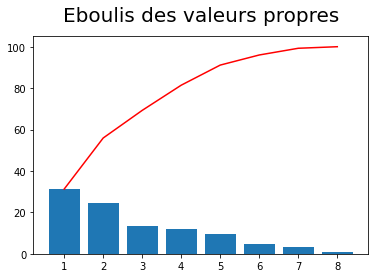

In [118]:
# Eboulis des valeurs propres

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red')
plt.title("Eboulis des valeurs propres", fontsize=20, pad=15)
#plt.savefig("eboulis.png", bbox_inches='tight', transparent=True)
plt.show()

Le coude de l'ébouli des valeurs propres apparaît au 5ème plan factoriel, ce qui est conséquent.
Néanmoins, les deux premiers plan factoriels cumulent 55.9% d'explication des composantes principales.

##### [sommaire](#S)

### B, Cercle des corrélations <a class='anchor' id='IIIB'></a>

In [119]:
pcs = pca.components_

In [120]:
# Calcul des composantes principales
cos = pd.DataFrame(np.round_(pcs,2), index=['F'+str(i+1) for i in range(len(dfx.columns))], columns=dfx.columns)
#cos = abs(cos)
cos = cos.transpose()
cos

,F1,F2,F3,F4,F5,F6,F7,F8
energy-kj_100g,0.59,-0.06,0.07,0.03,-0.13,-0.43,-0.05,-0.66
fat_100g,0.53,0.27,-0.16,-0.01,0.20,-0.26,-0.40,0.59
saturated-fat_100g,0.50,0.22,-0.24,0.01,0.16,0.59,0.52,-0.06
carbohydrates_100g,0.22,-0.60,0.15,0.10,-0.20,-0.25,0.52,0.44
sugars_100g,0.21,-0.58,-0.07,0.13,-0.15,0.53,-0.54,-0.03
fiber_100g,0.12,-0.06,0.81,-0.22,0.50,0.15,-0.04,-0.00
proteins_100g,0.12,0.38,0.43,-0.06,-0.77,0.19,-0.05,0.14
salt_100g,-0.04,0.15,0.20,0.96,0.12,0.01,-0.00,-0.00


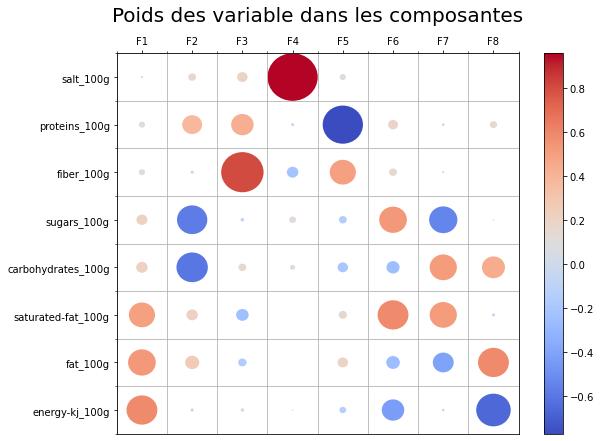

In [121]:
from matplotlib.collections import PatchCollection

N = len(cos.index)
M = len(cos.columns)
ylabels = cos.index
xlabels = cos.columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = cos.values  #np.random.randint(0, 180, size=(N,M))
c = cos.values   #np.random.rand(N, M)-0.5

fig, ax = plt.subplots(figsize=(9,7))

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="coolwarm")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')
ax.xaxis.tick_top()
plt.title("Poids des variable dans les composantes", fontsize=20, pad=15)
#plt.savefig("matrice_correlation.png", bbox_inches='tight', transparent=True)
fig.colorbar(col)
plt.show()

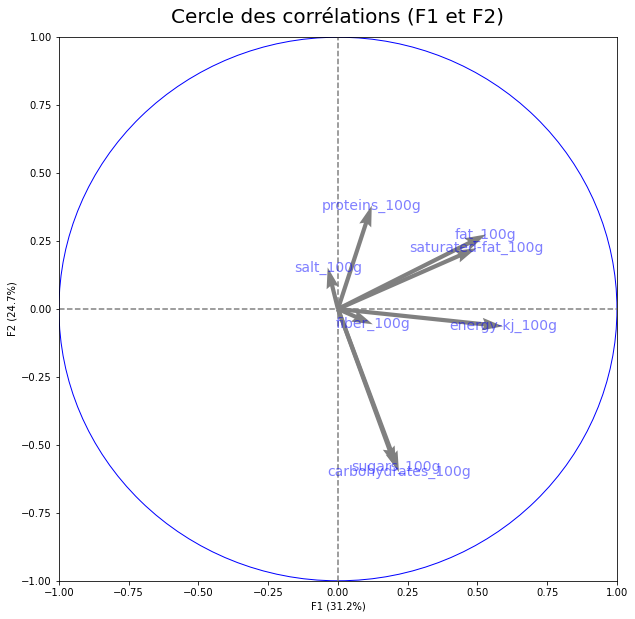

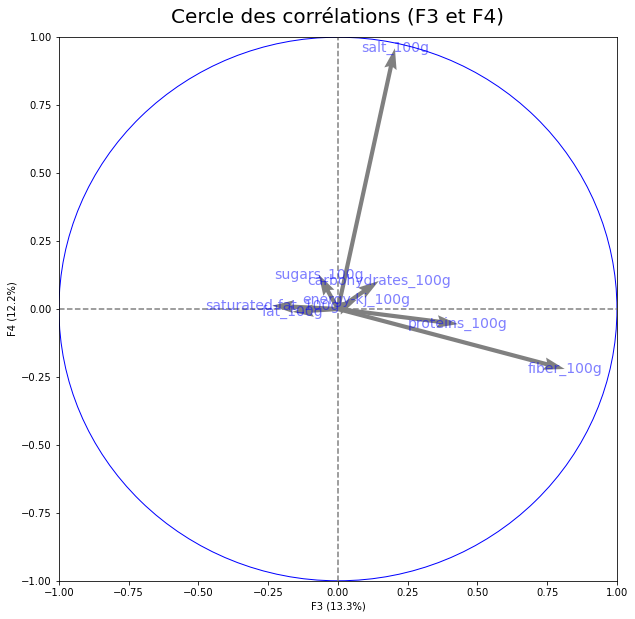

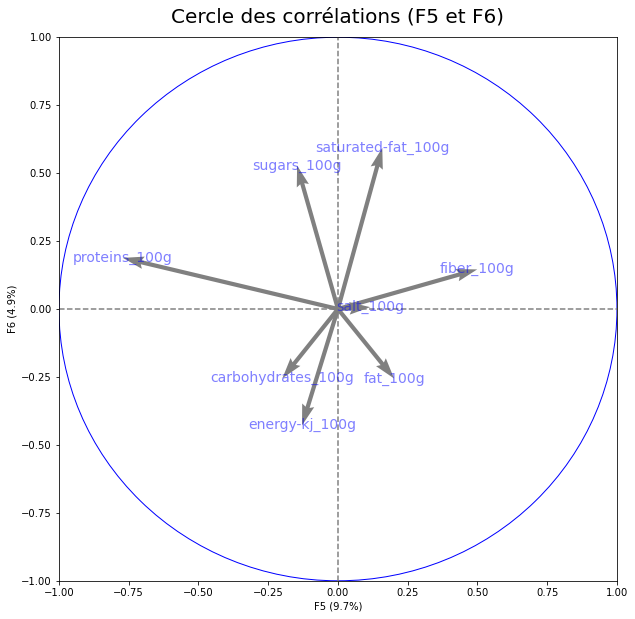

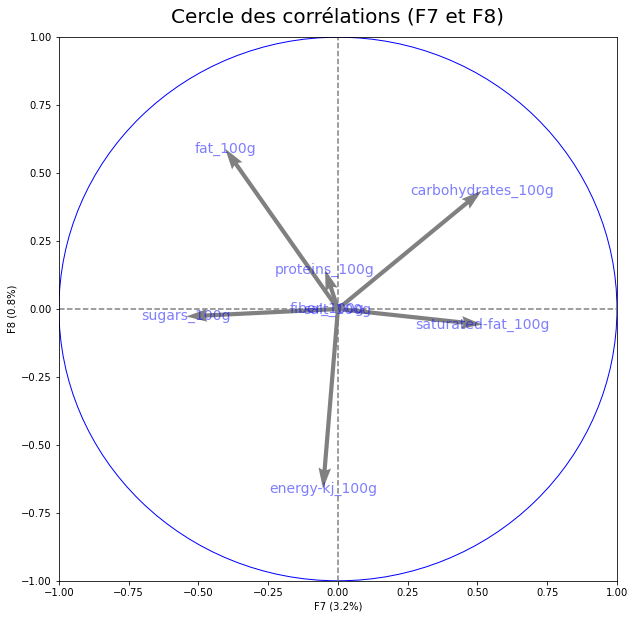

In [122]:
# Representation graphique des composantes

axis_ranks = [(0,1),(2,3),(4,5),(6,7), (8,9)]
xmin, xmax, ymin, ymax = -1,1,-1,1
labels = np.array(dfx.columns)
label_rotation = 0
for d1, d2 in axis_ranks:
    if d2 < len(dfx.columns) :
        fig, ax = plt.subplots(figsize=(10,10))
        plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]), pcs[d1,:], pcs[d2,:], angles='xy', scale_units='xy', scale=1, color='grey')
        if labels is not None:
            for i, (x, y) in enumerate(pcs[[d1,d2]].T):
                if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                    plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color='blue', alpha=0.5)
        circle = plt.Circle((0,0),1, facecolor='none', edgecolor='b')
        plt.gca().add_artist(circle)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.plot([-1,1], [0,0], color='grey', ls='--')
        plt.plot([0,0], [-1,1], color='grey', ls='--')
        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
        plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontsize=20, pad=15)
        #plt.savefig("cercle_des_correlations"+str(d1+1)+".png", bbox_inches='tight', transparent=True)
        plt.show(block=False)

Il ressort des graphiques précédemment exposés que la principale composante pour classer un produit est sa richesse nutritionnelle (en kcal et gras), plus le produit est riche, plus l aura de chances de se retrouver avec un nutriscore élevé.<br/>
La deuxième composante se concentre sur la teneur en sucre du produit.

##### [sommaire](#S)

### C, Représentation graphique <a class='anchor' id='IIIC'></a>

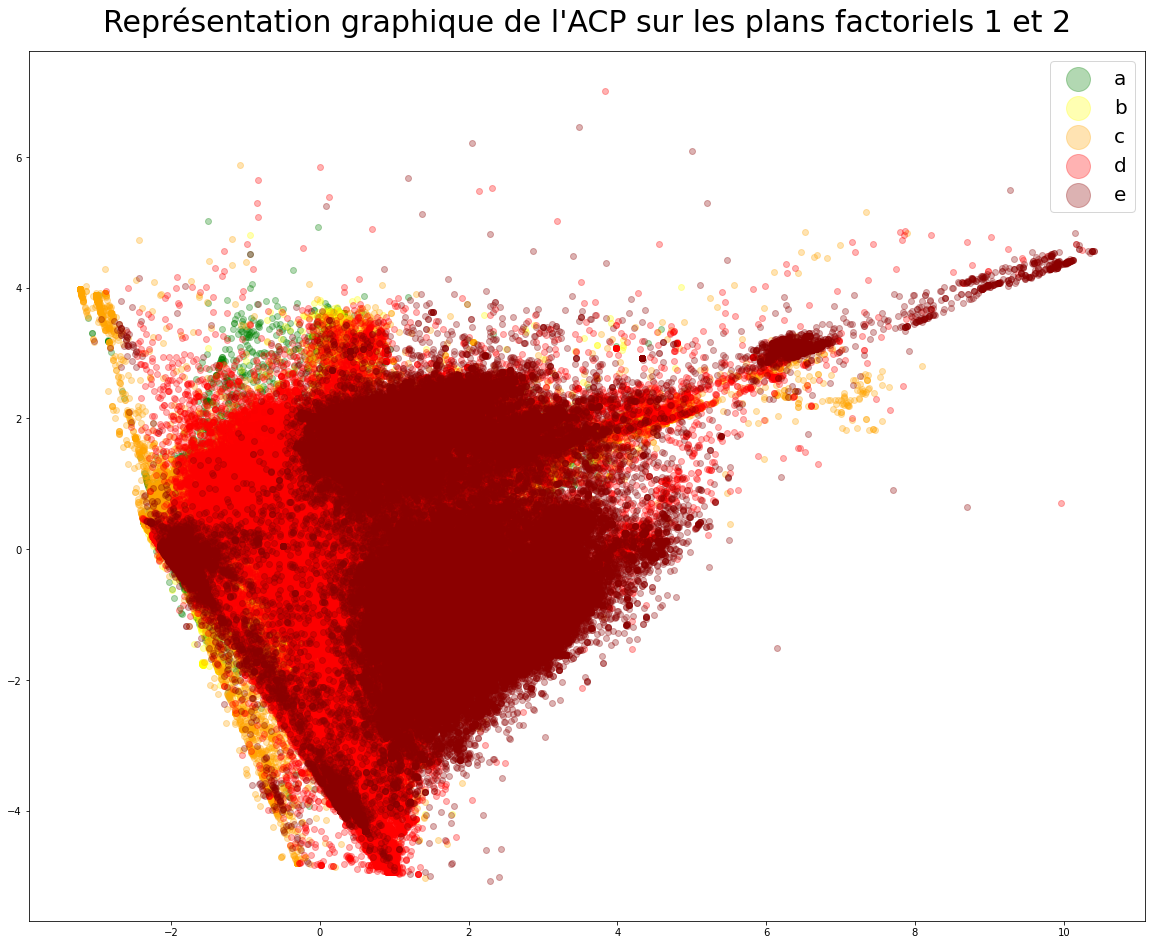

In [123]:
plt.figure(figsize=(20,16))
for couleur, k in zip(['green', 'yellow', 'orange', 'red', 'darkred'], ['a', 'b', 'c', 'd', 'e']):
    plt.scatter(acp[dfx.index==k,0], acp[dfx.index==k,1], c=couleur, label=k, alpha=0.3)
    plt.legend(fontsize=20, markerscale=4)
    plt.title("Représentation graphique de l'ACP sur les plans factoriels 1 et 2", fontsize=30, pad=20)
    #plt.savefig("acp_f1_f2.png", bbox_inches='tight', transparent=True)
plt.show()

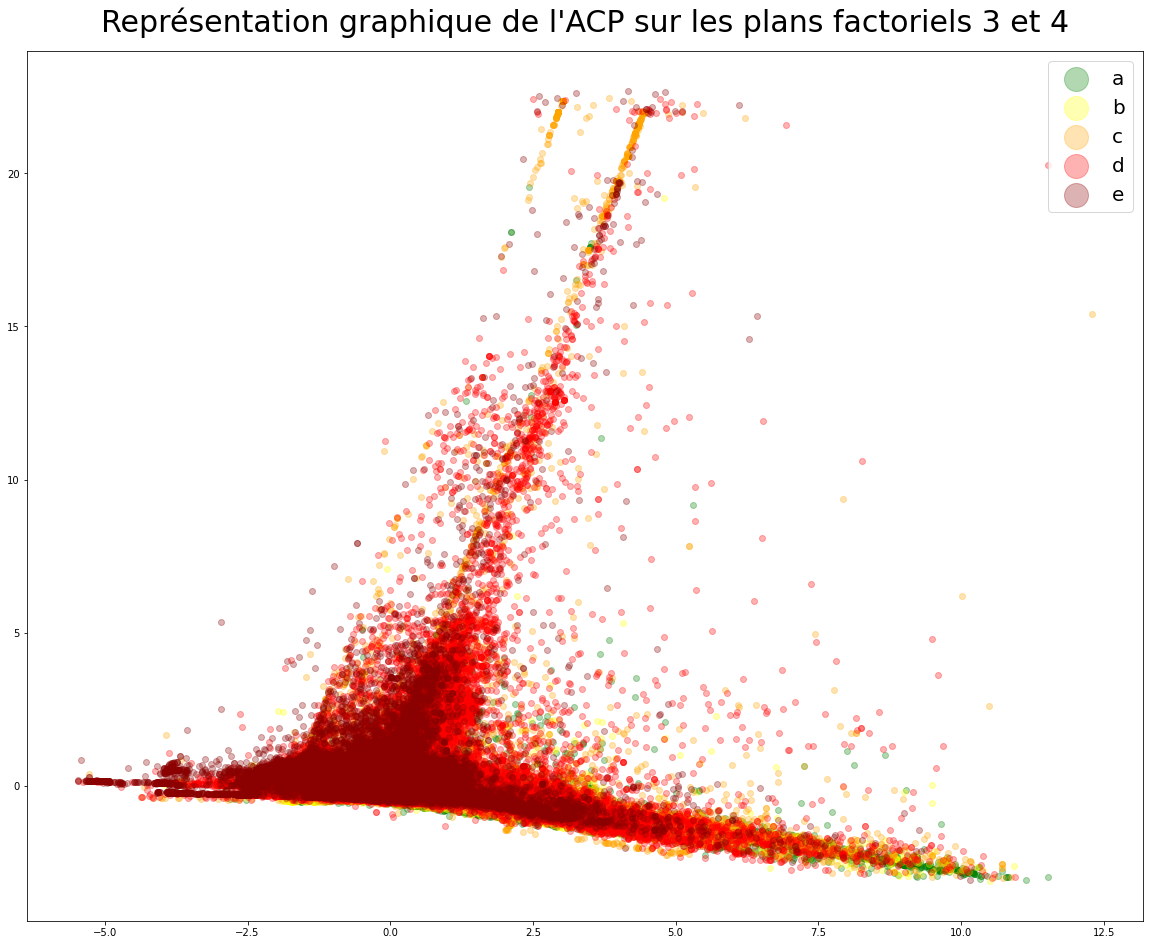

In [124]:
plt.figure(figsize=(20,16))
for couleur, k in zip(['green', 'yellow', 'orange', 'red', 'darkred'], ['a', 'b', 'c', 'd', 'e']):
    plt.scatter(acp[dfx.index==k,2], acp[dfx.index==k,3], c=couleur, label=k, alpha=0.3)
    plt.legend(fontsize=20, markerscale=4)
    plt.title("Représentation graphique de l'ACP sur les plans factoriels 3 et 4", fontsize=30, pad=20)
    #plt.savefig("acp_f3_f4.png", bbox_inches='tight', transparent=True)
plt.show()

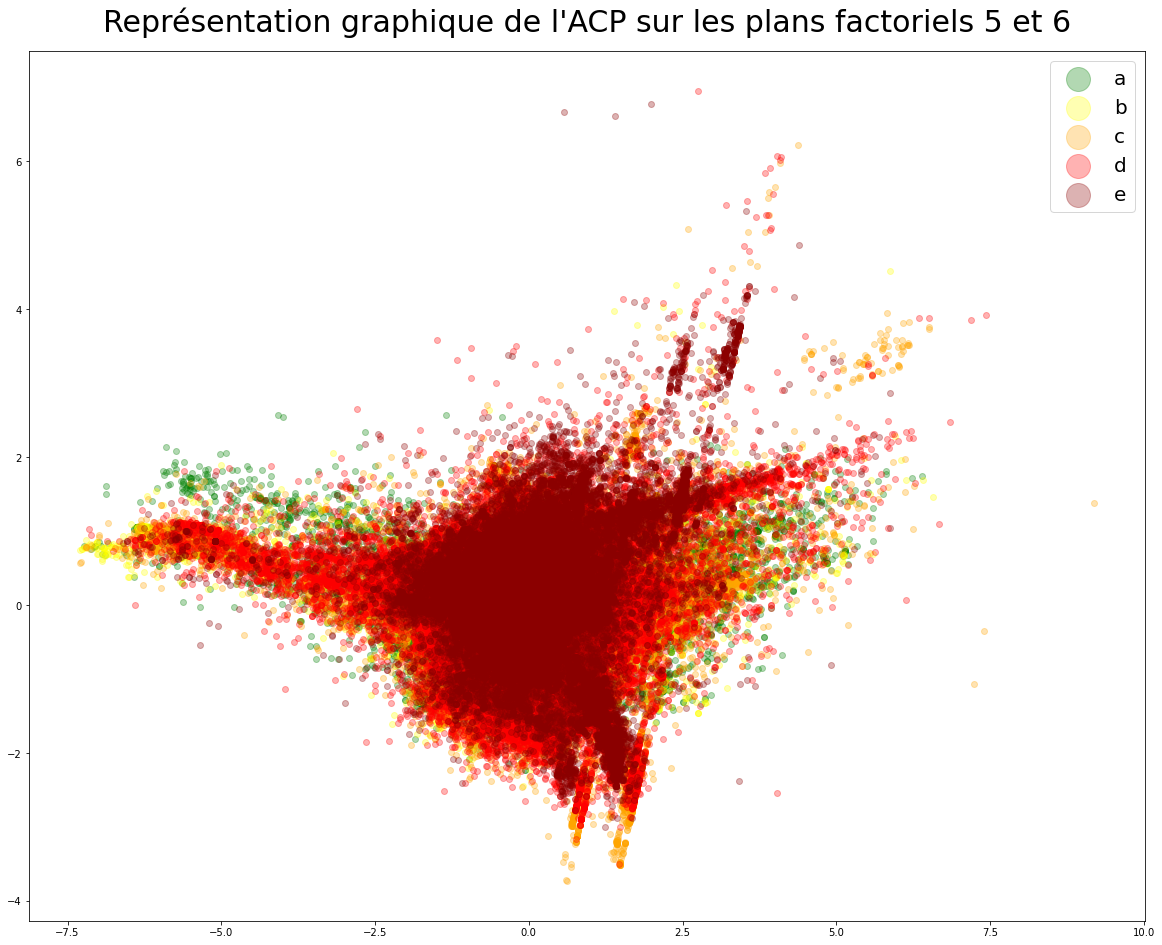

In [125]:
plt.figure(figsize=(20,16))
for couleur, k in zip(['green', 'yellow', 'orange', 'red', 'darkred'], ['a', 'b', 'c', 'd', 'e']):
    plt.scatter(acp[dfx.index==k,4], acp[dfx.index==k,5], c=couleur, label=k, alpha=0.3)
    plt.legend(fontsize=20, markerscale=4)
    plt.title("Représentation graphique de l'ACP sur les plans factoriels 5 et 6", fontsize=30, pad=20)
    #plt.savefig("acp_f5_f6.png", bbox_inches='tight', transparent=True)
plt.show()

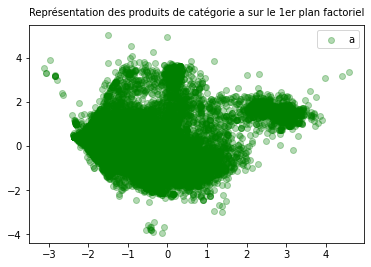

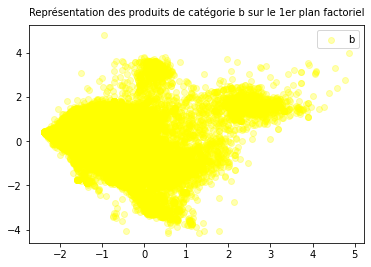

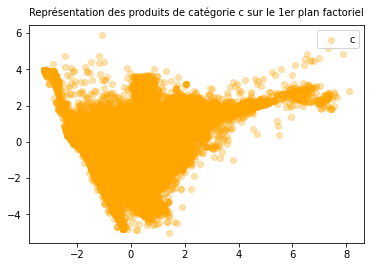

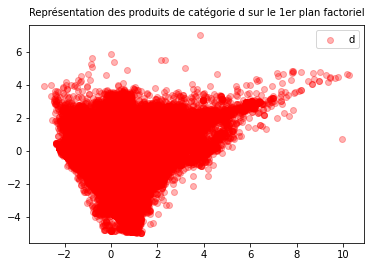

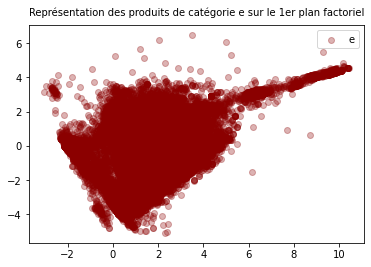

In [178]:
for i,c in zip(['a', 'b', 'c', 'd', 'e'], ['green', 'yellow', 'orange', 'red', 'darkred']):
        plt.scatter(acp[dfx.index==i,0], acp[dfx.index==i,1],alpha=0.3, label=i, c=c)
        plt.legend()
        plt.title("Représentation des produits de catégorie {} sur le 1er plan factoriel".format(i), pad=10, fontsize=10)
        #plt.savefig("acp_f1_f2"+i+".png", bbox_inches='tight', transparent=True)
        plt.show()

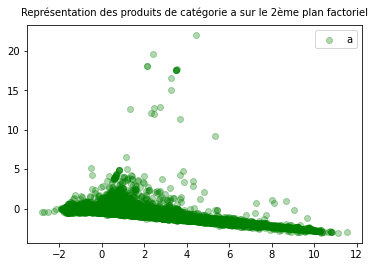

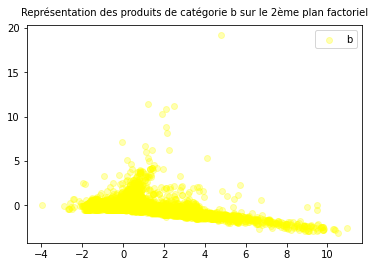

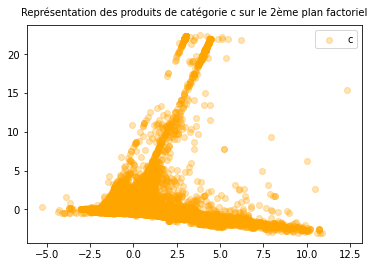

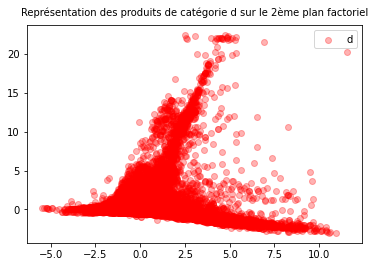

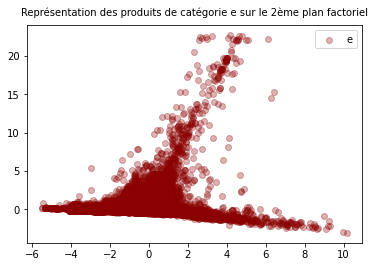

In [180]:
for i,c in zip(['a', 'b', 'c', 'd', 'e'], ['green', 'yellow', 'orange', 'red', 'darkred']):
        plt.scatter(acp[dfx.index==i,2], acp[dfx.index==i,3],alpha=0.3, label=i, c=c)
        plt.title("Représentation des produits de catégorie {} sur le 2ème plan factoriel".format(i), pad=10, fontsize=10)
        plt.legend()
        #plt.savefig("acp_f3_f4"+i+".png", bbox_inches='tight', transparent=True)
        plt.show()

Les représentations graphiques de l'ACP nous confirment ce que les analyses bivariées laissaient présager : toutes les varibles sont corrélées mais de manière assez floue. Nous n'avons pas de groupes de variables plus corrélées entre elles que d'autres.

##### [sommaire](#S)

## IV ANOVA <a class='anchor' id='IV'></a>

In [128]:
dfa = dft.merge(df.nutrigrade, left_index=True, right_index=True)

In [129]:
df_anova = dfa

In [130]:
df_anova.rename(columns={'energy-kj_100g' : 'energy_kj_100g', 'saturated-fat_100g' : 'saturated_fat_100g'}, inplace=True)

In [131]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [132]:
anova = smf.ols('nutriscore~energy_kj_100g+fat_100g+saturated_fat_100g+sugars_100g+fiber_100g+proteins_100g+salt_100g+carbohydrates_100g', data=df_anova).fit()

In [133]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             nutriscore   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                 1.180e+05
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:00:19   Log-Likelihood:            -1.7831e+06
No. Observations:              579131   AIC:                         3.566e+06
Df Residuals:                  579122   BIC:                         3.566e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6032      0.017    150.614      0.000       2.569       2.637
energy_kj_100g         0.0032   2.56e-05    125.431      0.000       0.003       0.003
fat_100g               0.0268      0.001     24.257      0.000       0.025       0.029
saturated_fat_100g     0.4255      0.001    321.089      0.000       0.423       0.428
sugars_100g            0.1809      0.001    358.287      0.000       0.180       0.182
fiber_100g            -0.6395      0.005   -137.921      0.000      -0.649      -0.630
proteins_100g          0.0470      0.001     54.328      0.000       0.045       0.049
salt_100g              0.2799      0.002    171.766      0.000       0.277       0.283
carbohydrates_100g    -0.0322      0.001    -59.762      0.000      -0.033      -0.031
==============================================================================
Omnibus:                    30073.094   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61971.888
Skew:                          -0.367   Prob(JB):                         0.00
Kurtosis:                       4.425   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

L'ensemble des variables nutrinionnelles explique pour 62% le nutriscore.<br/>
La forte valeur du coefficient de Fischer et la faiblesse de la 'p-value' nous indiquent que cela n'est pas du au hasard.

Néanmoins cela veut implicitement dire que 38% du nutriscore n'est pas expliqué par les valeurs nutritionnelles des produits.<br/>


Or, le calcul du nutriscore se fait exclusivement avec ces valeurs. Cela veut dire que des erreurs de saisi dans les données faussent les résultats, les données ne sont pas totalement fiables.

##### [sommaire](#S)

## V, Application <a class='anchor' id='V'></a>

In [134]:
df['recherche'] = df['product_name'].map(str) +" "+ df['brands'].map(str) +" "+ df.categories.map(str) +" "+ df.pnns_groups_1.map(str)  +" "+ df.pnns_groups_2.map(str)

In [135]:
recherche = []
for i in df.recherche:
    temp = i.split()
    temp = [x for x in temp if str(x) != 'nan']
    temp = [x for x in temp if str(x) != 'unknown']
    recherche.append(temp)

In [136]:
df['recherche'] = recherche

In [137]:
df['recherche'] = [', '.join(map(str, l)) for l in df['recherche']]

In [138]:
df.head()

,product_name,brands,categories,pnns_groups_1,pnns_groups_2,image_url,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore,nutrigrade,recherche
0,vitória crackers,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,1570.0500,7.0,3.08,70.1,15.0,NaN,7.8,1.40,-1.4,a,"vitória, crackers"
1,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,936.0000,8.2,2.20,29.0,22.0,0.0,5.1,4.60,18.0,d,"moutarde, au, moût, de, raisin, courte, paille..."
2,sauce sweety chili 0%,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,87.9228,0.0,0.00,4.8,0.4,NaN,0.2,2.04,6.0,c,"sauce, sweety, chili, 0%"
3,mini coco,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,251.2080,3.0,1.00,10.0,3.0,NaN,2.0,1.15,3.2,b,"mini, coco"
4,pur jus de pomme,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,263.7684,0.0,0.00,15.5,15.5,NaN,0.2,0.00,13.0,d,"pur, jus, de, pomme"


In [139]:
def recherche_produit(arg_1, arg_2="", arg_3="", arg_4="", arg_5=""):
        temp = df[(df.recherche.str.contains(arg_1)) & (df.recherche.str.contains(arg_2)) & (df.recherche.str.contains(arg_3)) & (df.recherche.str.contains(arg_4)) & (df.recherche.str.contains(arg_5))]
        if temp.shape[0] == 0:
            print('Recherche infructueuse.')
            return
        return temp.sort_values(by=['nutrigrade','nutriscore'])

In [140]:
recherche_produit('tomate', 'poivron', 'aubergine')

,product_name,brands,categories,pnns_groups_1,pnns_groups_2,image_url,energy-kj_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore,nutrigrade,recherche
181956,sauce tomates poivrons aubergines,franprix,"Epicerie, Sauces, Sauces pour pâtes",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,393.5592,6.8,2.0,5.0,3.7,2.8,1.70,0.90,-3.0,a,"sauce, tomates, poivrons, aubergines, franprix..."
350873,mitonnée de tomates aubergines et poivrons,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,242.8344,3.0,0.4,6.9,4.2,NaN,1.90,1.15,1.2,a,"mitonnée, de, tomates, aubergines, et, poivrons"
369219,sauce tomate bio aubergines et poivrons,divin bio,"Epicerie, Sauces, Sauces tomate",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,293.0760,5.6,0.6,3.6,3.1,1.2,0.70,1.70,1.0,b,"sauce, tomate, bio, aubergines, et, poivrons, ..."
229237,ratatouille tomates aubergines courgettes poiv...,monoprix,"Plats préparés, Légumes préparés, Ratatouilles",Composite foods,One-dish meals,https://images.openfoodfacts.org/images/produc...,280.5156,4.9,0.5,3.3,3.0,NaN,1.30,0.60,2.0,b,"ratatouille, tomates, aubergines, courgettes, ..."
236430,sauté de porc à la sauce tomate polenta auberg...,"u saveurs, u","Surgelés, Plats préparés, Plats préparés surgelés",Composite foods,One-dish meals,https://images.openfoodfacts.org/images/produc...,475.0000,5.9,2.4,7.0,2.7,0.9,7.70,0.77,2.0,b,"sauté, de, porc, à, la, sauce, tomate, polenta..."
130666,compotée tomates poivrons aubergines,louis martin,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,715.9428,1.0,1.0,8.0,0.0,NaN,1.40,0.00,4.2,b,"compotée, tomates, poivrons, aubergines, louis..."
291172,sauce poivrons aubergines,"turini,marque repère","Epicerie, Sauces, Sauces tomate",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,715.0000,15.0,1.9,6.0,4.8,3.0,2.00,1.00,3.0,c,"sauce, poivrons, aubergines, turini,marque, re..."
221672,sauce tomate poivrons et aubergines,lucien georgelin,"Epicerie, Sauces, Sauces tomate, Sauces aux lé...",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,309.8232,4.2,0.6,6.3,5.8,1.7,1.06,1.70,5.0,c,"sauce, tomate, poivrons, et, aubergines, lucie..."
299107,"sauce poivrons, aubergines & parmesan","les délices de savino,agidra","Epicerie, Sauces, Sauces tomate, Sauces tomate...",Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,687.0000,13.0,2.6,6.6,4.9,NaN,4.30,1.00,5.0,c,"sauce, poivrons,, aubergines, &, parmesan, les..."


##### [sommaire](#S)

##### fin de page <a class='anchor' id='eop'></a>